1. 

In [3]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
os.chdir("/Users/[editted]/Documents/MA_cbg_human_mobility_2020")

In [5]:

mobility02_df = pd.read_csv('MA_cbg2cbg_2020_02.csv')
mobility04_df = pd.read_csv('MA_cbg2cbg_2020_04.csv')
print(mobility02_df.columns, mobility02_df.shape)
print(mobility04_df.columns, mobility04_df.shape)
mobility02_df.head()


Index(['poi_cbg', 'year_month', 'raw_device_counts', 'visitor_census_tract',
       'visitor_count'],
      dtype='object') (939439, 5)
Index(['poi_cbg', 'year_month', 'raw_device_counts', 'visitor_census_tract',
       'visitor_count'],
      dtype='object') (384826, 5)


,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250056551003,2020_2,1400,250056551003,95
1,250056551003,2020_2,1400,250056551002,65
2,250056551003,2020_2,1400,250056554001,40
3,250056551003,2020_2,1400,250056516002,38
4,250056551003,2020_2,1400,250056551001,38


In [6]:
mobility04_df.head()

,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250010135001,2020_4,417,250010135001,120
1,250010135001,2020_4,417,250010136001,31
2,250010135001,2020_4,417,250010134003,16
3,250010135001,2020_4,417,250010135004,13
4,250010135001,2020_4,417,250010135002,10


In [7]:
vdc02t = mobility02_df['raw_device_counts'].sum()
print(vdc02t)

4706322007


In [8]:
vdc04t = mobility04_df['raw_device_counts'].sum()
print(vdc04t)

549289419


We can see that the total number of raw device decreased a lot from Feb to Apr. One of the reasons why might be the decrease of surveyed population. 

In [9]:
vdc02m = mobility02_df['raw_device_counts'].mean()
print(vdc02m)

5009.715380136443


In [10]:
vdc04m = mobility04_df['raw_device_counts'].mean()
print(vdc04m)

1427.3708611164527


from the results shown above, we can see the mean of raw device counts decrease dramatically from Feb to Apr, so can conclude that people are more willing to mobilize before the pandemic. 

In [11]:
vdc04std = mobility04_df['raw_device_counts'].std()
print(vdc04std)

2259.596924781025


In [12]:
vdc02std = mobility02_df['raw_device_counts'].std()
print(vdc02std)

9815.890268219478


The standard deviation of Apr is much smaller than it was in Feb, so the mobility in Apr is clustered around the mean. People in Feb had more choices than they do in Apr, because of a higher value of standard deviation, some people mobilized a lot and some of them did not. After the pandemic, based on the second result, people are not mobilize as before but staying at home, so the standard deviatioin decreases in Apr. 

2. 

In [13]:
import networkx as nx
G = nx.Graph()

In [14]:
for i in range(len(mobility02_df)):
    origin_cbg = mobility02_df.loc[i, 'poi_cbg']
    destination_cbg = mobility02_df.loc[i, 'visitor_census_tract']
    if str(origin_cbg)[:2] == '25' and str(destination_cbg)[:2] == '25':
        total_residents_in_origin = mobility02_df.loc[i, 'raw_device_counts']
        num_visitor = mobility02_df.loc[i, 'visitor_count']
        percent_visitor = num_visitor / total_residents_in_origin
        # add an edge/tie between two neighborhoods with weight being percentage of residents from one neighborhood visiting another
        G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)
        # G.remove_edge(origin_cbg, destination_cbg) # removing edge

In [15]:
print(nx.info(G))

Graph with 4984 nodes and 635681 edges


/var/folders/r8/83_dlqf14nn0b3855_ng_wsh0000gn/T/ipykernel_55566/894750091.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


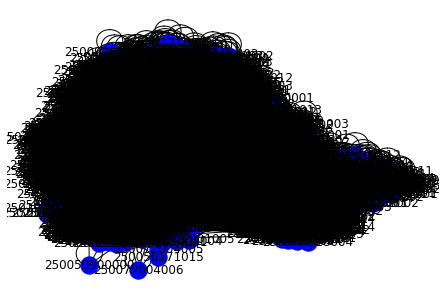

In [18]:
my_pos = nx.spring_layout(G, seed = 100)
nx.draw(G, with_labels=True, pos=my_pos, node_color='blue')

In [28]:
d = nx.closeness_centrality(G, u = None, distance = None, wf_improved = True)
print(d)

{250056551003: 0.4611327040533037, 250056551002: 0.5150919991730412, 250056554001: 0.49356180665610144, 250056516002: 0.518522372528616, 250056551001: 0.48633613117314073, 250056554003: 0.5039441747572816, 250056553001: 0.5152517836831765, 250056554004: 0.4848691252310986, 250235601005: 0.49616648411829134, 250056552002: 0.47371423139081664, 250056554002: 0.44085640980270724, 250056553003: 0.46439888164026094, 250235601003: 0.4772074315265275, 250235601006: 0.5085212776813961, 250056541004: 0.5086250893130551, 250056541003: 0.4996490524415923, 250235411002: 0.5127598271249229, 250056552005: 0.48633613117314073, 250056552003: 0.46470204233889767, 250056552001: 0.4947870122132857, 250056542002: 0.5027239709443099, 250056553002: 0.47881233784952437, 250056552004: 0.47169632714880727, 250235411001: 0.5099263200982399, 250235601002: 0.4932198356923686, 250235601001: 0.4629319955406912, 250056541002: 0.48624121779859486, 250235611004: 0.5000501756146513, 250056531021: 0.5120748124550406, 250

In [30]:
print(min(d, key = d.get))

250056171015


In [31]:
print(d[250056171015])

0.3381514657980456


In [36]:
print(max(d, key = d.get))

250259813002


In [37]:
print(d[250259813002])

0.8085348044783385


<AxesSubplot:xlabel='Node', ylabel='Mean Distance'>

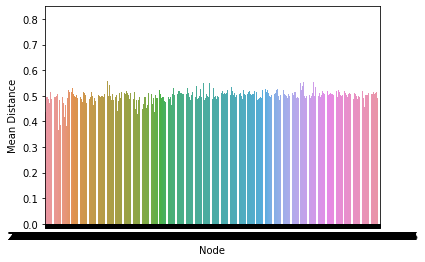

In [29]:
df = pd.DataFrame(columns=['Node','Mean Distance'])
key_lst = list(d.keys())
value_lst = list(d.values())
df['Node'] = key_lst
df['Mean Distance'] = value_lst
df

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Node', y='Mean Distance', data=df)

The smallest average shortest distance between neighbor to neighbor is 0.338151, which is 250056171015, so this neighbor in Feb has the most frequent mobility. The largest of neighbor is 250259813002, so this neighbor had the least frequent mobility in feb. Meanwhile, in the barplot, we can clearly see the most of values are assembled around value of 0.5.

In [35]:
print(nx.clustering(G))

{250056551003: 0.45912786400591277, 250056551002: 0.2943980191891055, 250056554001: 0.4539447496218454, 250056516002: 0.23543409743933774, 250056551001: 0.47510628247520076, 250056554003: 0.41342832469775476, 250056553001: 0.2590638528138528, 250056554004: 0.45046027131782945, 250235601005: 0.3792039800995025, 250056552002: 0.43232880914040334, 250056554002: 0.541980198019802, 250056553003: 0.4619805481874447, 250235601003: 0.41586165772212286, 250235601006: 0.27944188428059397, 250056541004: 0.381882721225334, 250056541003: 0.36199095022624433, 250235411002: 0.2832656913638509, 250056552005: 0.5049377415199656, 250056552003: 0.4502894954507858, 250056552001: 0.4131276582238304, 250056542002: 0.3921622237411711, 250056553002: 0.4279030910609858, 250056552004: 0.5097832947612034, 250235411001: 0.2717655642023346, 250235601002: 0.4068283917340521, 250235601001: 0.4013557737260402, 250056541002: 0.5140929535232384, 250235611004: 0.3239403267819086, 250056531021: 0.32477893118031526, 25005

In [38]:
nx.average_clustering(G)

0.3358877036019045

In [ ]:
nx.average_clustering(H)

From the data shown above, poeple's mobility decreased and they are having less connections than before.

In [20]:
H = nx.Graph()

In [21]:
for i in range(len(mobility04_df)):
    origin_cbg = mobility04_df.loc[i, 'poi_cbg']
    destination_cbg = mobility04_df.loc[i, 'visitor_census_tract']
    if str(origin_cbg)[:2] == '25' and str(destination_cbg)[:2] == '25':
        total_residents_in_origin = mobility04_df.loc[i, 'raw_device_counts']
        num_visitor = mobility04_df.loc[i, 'visitor_count']
        percent_visitor = num_visitor / total_residents_in_origin
        H.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)

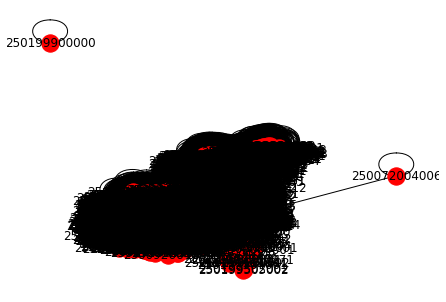

In [24]:
my_pos1 = nx.spring_layout(H, seed = 100)
nx.draw(H, with_labels=True, pos=my_pos1, node_color='red')

In [41]:
e = nx.closeness_centrality(H, u = None, distance = None, wf_improved = True)
print(e)

{250010135001: 0.41048036587641545, 250010136001: 0.4777064148664354, 250010134003: 0.429667977631915, 250010135004: 0.3829362183429712, 250010135002: 0.3943015592118761, 250010135003: 0.4066938939299637, 250010136002: 0.4069264233147149, 250010136003: 0.38867219540037873, 250010131004: 0.41693867274600843, 250010134004: 0.38852064264540703, 250173567023: 0.4905957853906504, 250010122003: 0.44641578858799774, 250214042013: 0.4244334810565731, 250010133003: 0.4502078619774132, 250250601014: 0.41051418924209415, 250010125023: 0.3944888906993471, 250173703004: 0.4423725981745742, 250173839013: 0.4445039436689914, 250010117003: 0.4445039436689914, 250235454004: 0.43096887548806706, 250010144022: 0.43317974094792233, 250010151001: 0.4128273285251951, 250010139002: 0.4049089889988666, 250251604001: 0.5212387738692252, 250010134001: 0.37816913622605547, 250010126024: 0.384799582964552, 250010120014: 0.4727203909898524, 250010122001: 0.3761987616583897, 250010129003: 0.4075255787846262, 250010

The smallest average shortest distance between neighbor to neighbor is 0.338151, which is 250056171015, so this neighbor in Feb has the most frequent mobility. The largest of neighbor is 250259813002, so this neighbor had the least frequent mobility in feb. Meanwhile, in the barplot, we can clearly see the most of values are assembled around value of 0.5. Compared to the results in Apr, we can conclude that people are having less mobility during two month.

In [45]:
mob02 = nx.spring_layout(G, seed = 675)
nx.draw(G, mob02, nx.betweenness_centrality(G), 'Betweenness Centrality')

KeyboardInterrupt: 

In [ ]:
mob04 = nx.spring_layout(H, seed = 675)
nx.draw(H, mob04, nx.betweenness_centrality(H), 'Betweenness Centrality')

Betweenness Centrality measures the number of the shortest paths passing by the given nodes, and in Apr the centrality is smaller than it was in Feb, so we can say that people's connections on dependence reduced during the pandemic.